In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

- Orijinal data

In [78]:
df = pd.read_csv('TrainAndValid.csv', parse_dates=['saledate'], low_memory=False)
df.head() 

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Kullanacağım Veri

In [79]:
def drop_colums(data):
    for i in data.columns:
        num = data[i].isnull().sum()
        if num > 250000:
            data = data.drop(columns = i)
    return data

In [80]:
data = df.copy()
data = drop_colums(data)

data = data.drop(columns = "saledate")
data = data.drop(columns = "fiBaseModel")
data = data.drop(columns = "fiProductClassDesc")


In [81]:
data.isnull().sum()

SalesID                  0
SalePrice                0
MachineID                0
ModelID                  0
datasource               0
auctioneerID         20136
YearMade                 0
fiModelDesc              0
fiSecondaryDesc     140727
ProductSize         216605
state                    0
ProductGroup             0
ProductGroupDesc         0
Enclosure              334
Forks               214983
Transmission        224691
Hydraulics           82565
Coupler             192019
dtype: int64

In [82]:
data.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,fiModelDesc,fiSecondaryDesc,ProductSize,state,ProductGroup,ProductGroupDesc,Enclosure,Forks,Transmission,Hydraulics,Coupler
0,1139246,66000.0,999089,3157,121,3.0,2004,521D,D,NaN,Alabama,WL,Wheel Loader,EROPS w AC,None or Unspecified,NaN,2 Valve,None or Unspecified
1,1139248,57000.0,117657,77,121,3.0,1996,950FII,F,Medium,North Carolina,WL,Wheel Loader,EROPS w AC,None or Unspecified,NaN,2 Valve,None or Unspecified
2,1139249,10000.0,434808,7009,121,3.0,2001,226,NaN,NaN,New York,SSL,Skid Steer Loaders,OROPS,None or Unspecified,NaN,Auxiliary,None or Unspecified
3,1139251,38500.0,1026470,332,121,3.0,2001,PC120-6E,NaN,Small,Texas,TEX,Track Excavators,EROPS w AC,NaN,NaN,2 Valve,None or Unspecified
4,1139253,11000.0,1057373,17311,121,3.0,2007,S175,NaN,NaN,New York,SSL,Skid Steer Loaders,EROPS,None or Unspecified,NaN,Auxiliary,None or Unspecified


- Fixing to missing value

In [83]:
def fix_missing(df, col, name):
    if pd.api.types.is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name + "_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())
    else:
        df[name] = col.fillna("NO VALUE")
        

In [84]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

- Correcting to missing value 
- converting data to categoric value

In [85]:
for i in data.columns:
    num = data[i].isnull().sum()
    if num != 0:
        fix_missing(data, data[i], i)
        data[i] = le.fit_transform(data[i])

data["fiModelDesc"] = le.fit_transform(data["fiModelDesc"])
data["ProductGroup"] = le.fit_transform(data["ProductGroup"])
data["state"] = le.fit_transform(data["state"])
data["ProductGroupDesc"] = le.fit_transform(data["ProductGroupDesc"])
data["Enclosure"] = le.fit_transform(data["Enclosure"])
data["Forks"] = le.fit_transform(data["Forks"])
data["Transmission"] = le.fit_transform(data["Transmission"])
data["Hydraulics"] = le.fit_transform(data["Hydraulics"])
data["Coupler"] = le.fit_transform(data["Coupler"])
data["auctioneerID_na"] = le.fit_transform(data["auctioneerID_na"])

- auctioneerID_na 
    - 0 = False
    - 1 = True

In [86]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,fiModelDesc,fiSecondaryDesc,ProductSize,state,ProductGroup,ProductGroupDesc,Enclosure,Forks,Transmission,Hydraulics,Coupler,auctioneerID_na
0,1139246,66000.0,999089,3157,121,3,2004,962,42,5,0,5,5,2,1,4,0,3,0
1,1139248,57000.0,117657,77,121,3,1996,1744,56,3,32,5,5,2,1,4,0,3,0
2,1139249,10000.0,434808,7009,121,3,2001,335,107,5,31,2,2,6,1,4,3,3,0
3,1139251,38500.0,1026470,332,121,3,2001,3715,107,6,43,3,3,2,0,4,0,3,0
4,1139253,11000.0,1057373,17311,121,3,2007,4260,107,5,31,2,2,0,1,4,3,3,0


In [87]:
data.isnull().sum()

SalesID             0
SalePrice           0
MachineID           0
ModelID             0
datasource          0
auctioneerID        0
YearMade            0
fiModelDesc         0
fiSecondaryDesc     0
ProductSize         0
state               0
ProductGroup        0
ProductGroupDesc    0
Enclosure           0
Forks               0
Transmission        0
Hydraulics          0
Coupler             0
auctioneerID_na     0
dtype: int64

<AxesSubplot:>

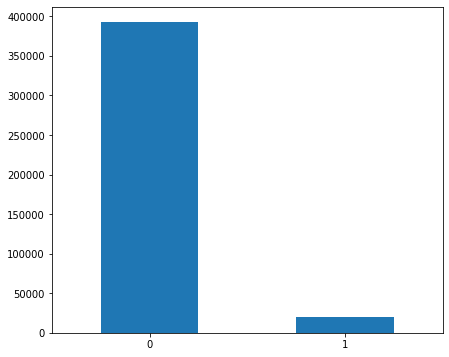

In [88]:
data["auctioneerID_na"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

- Train Validation and Test

In [89]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = data.drop(columns = ['SalePrice']).copy()
y = data['SalePrice']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print("X Train: ", X_train.shape), print("Y Train: ", y_train.shape)
print("X Valid: ", X_valid.shape), print("Y Valid: ", y_valid.shape)
print("X Test: ", X_test.shape), print("Y Test: ", y_test.shape)

X Train:  (330158, 18)
Y Train:  (330158,)
X Valid:  (41270, 18)
Y Valid:  (41270,)
X Test:  (41270, 18)
Y Test:  (41270,)


(None, None)

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

- Regression

In [92]:
m = RandomForestRegressor(n_estimators = 70, min_samples_leaf = 5, max_features = 0.5, n_jobs = -1, oob_score = True)
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8970647395609704

- Error (RMSE)

In [93]:
def rmse(x, y):
    return math.sqrt(((x - y)**2).mean())

In [94]:
def print_score(m):
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")
    

In [95]:
print_score(m)

RMSE of train set 7414.432655266133
RMSE of validation set 9639.433893655309
R^2 of train set 0.8970647395609704
R^2 of validation set 0.8267893547849339
